In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from scipy.stats import linregress

## Data Analysis

1. **LIT (Global X Lithium & Battery Tech ETF)**
   - Description: This ETF focuses on companies involved in lithium mining and battery production.
   - Potential Correlation with Tesla: There could be a high positive correlation with Tesla due to its reliance on lithium-ion batteries for electric vehicles.

2. **SOXX (iShares PHLX Semiconductor ETF)**
   - Description: This ETF tracks the performance of companies in the semiconductor sector.
   - Potential Correlation with Tesla: While not directly related to Tesla's core business, semiconductor companies supply components for electric vehicles, potentially leading to a moderate positive correlation.

3. **TAN (Invesco Solar ETF)**
   - Description: TAN invests in companies involved in the solar energy industry.
   - Potential Correlation with Tesla: Although not directly related to Tesla's electric vehicles, Tesla's commitment to sustainability and its development of solar products could lead to a moderate positive correlation.

4. **HAIL (SPDR S&P Kensho Smart Mobility ETF)**
   - Description: HAIL focuses on companies involved in smart mobility, including autonomous and electric vehicle technologies.
   - Potential Correlation with Tesla: Given Tesla's leadership in electric vehicles and autonomous driving technology, there could be a high positive correlation.

5. **PICK (iShares MSCI Global Metals & Mining Producers ETF)**
   - Description: PICK invests in companies involved in metal and mining production.
   - Potential Correlation with Tesla: While not directly related to Tesla's products, it could have a moderate positive correlation due to Tesla's need for metals like lithium, nickel, and cobalt in its batteries.

6. **KARS (KraneShares Electric Vehicles and Future Mobility Index ETF)**
   - Description: KARS tracks the performance of companies involved in the electric vehicle and future mobility industries.
   - Potential Correlation with Tesla: It could have a high positive correlation with Tesla due to its focus on electric vehicle technology.

7. **IGV (iShares Expanded Tech-Software Sector ETF)**
   - Description: IGV invests in software companies, including those involved in cloud computing and cybersecurity.
   - Potential Correlation with Tesla: While not directly related to Tesla's products, it could have a moderate positive correlation due to Tesla's use of software in its vehicles and operations.

8. **ARKG (ARK Genomic Revolution ETF)**
   - Description: ARKG focuses on companies involved in genomics, including CRISPR technology and gene therapy.
   - Potential Correlation with Tesla: While seemingly unrelated to Tesla, both Tesla and genomic companies are often seen as part of innovative, high-growth sectors, potentially leading to a moderate positive correlation.

9. **FAN (First Trust Global Wind Energy ETF)**
   - Description: FAN invests in companies involved in the wind energy industry.
   - Potential Correlation with Tesla: While not directly related to Tesla's products, it could have a moderate positive correlation due to Tesla's broader focus on renewable energy and sustainability initiatives.


In [2]:
etf_tickers = ["LIT", "SOXX", "TAN", "HAIL", "PICK", "KARS", "IGV", "ARKG", "FAN", "TSLA"]

etf_tickers2 = ["TAN", "LIT", "KARS", "XOP", "HAIL", "IXC", "FAN", "PICK", "FCG", "TSLA"]

etf_names = etf_tickers
file_names = [f"Data/{ticker}.csv" for ticker in etf_names]
columns_to_drop = ["High", "Low", "Dividends", "Volume", "Stock Splits", "Capital Gains"]
cols = [f"Return_{ticker}" for ticker in etf_names]
cols_2 = [f"Rolling_Mean_{ticker}" for ticker in etf_names]

In [3]:
start_date = "2020-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

for symbol in etf_names:
    stock = yf.Ticker(symbol)
    
    historical_data = stock.history(start=start_date, end=end_date)
    
    filename = f"Data/{symbol}.csv"
    historical_data.to_csv(filename)

In [4]:
dfs = []
window_size = 2
for file_name, etf_name in zip(file_names, etf_names):
    df = pd.read_csv(file_name).drop(columns = columns_to_drop, errors='ignore')
    df["Return"] = (df["Close"] - df["Open"])/df["Open"] * 100
    df['Rolling_Mean'] = df['Return'].rolling(window=window_size).mean()
    df.rename(columns={'Open': 'Open_' + etf_name, 'Close': 'Close_' + etf_name, 'Return': 'Return_' + etf_name, "Rolling_Mean": "Rolling_Mean_" + etf_name}, inplace=True)
    dfs.append(df)

etfs = dfs[0]
for df, etf_name in zip(dfs[1:], etf_names[1:]):
    etfs = pd.merge(etfs, df, on="Date", how="outer", suffixes=('', '_' + etf_name))
    
tsla = dfs[-1]


In [5]:
etfs

Date   Open_LIT  Close_LIT  Return_LIT  \
0     2020-01-02 00:00:00-05:00  26.907333  26.907333    0.000000   
1     2020-01-03 00:00:00-05:00  26.557632  26.538204   -0.073155   
2     2020-01-06 00:00:00-05:00  26.324501  26.654772    1.254613   
3     2020-01-07 00:00:00-05:00  26.839332  27.014181    0.651467   
4     2020-01-08 00:00:00-05:00  26.343930  26.450781    0.405600   
...                         ...        ...        ...         ...   
1079  2024-04-17 00:00:00-04:00  43.189999  43.150002   -0.092607   
1080  2024-04-18 00:00:00-04:00  43.209999  42.910000   -0.694282   
1081  2024-04-19 00:00:00-04:00  42.320000  42.419998    0.236291   
1082  2024-04-22 00:00:00-04:00  42.080002  42.330002    0.594106   
1083  2024-04-23 00:00:00-04:00  41.939999  42.340000    0.953747   

      Rolling_Mean_LIT   Open_SOXX  Close_SOXX  Return_SOXX  \
0                  NaN   75.140091   75.740005     0.798395   
1            -0.036577   74.572684   74.327400    -0.328919   
2             0.590729   73.393548   73.553131     0.217435   
3             0.953040   74.469241   74.906616     0.587323   
4             0.528533   75.054369   74.838631    -0.287443   
...                ...         ...         ...          ...   
1079         -0.186293  217.100006  210.360001    -3.104563   
1080         -0.393445  208.860001  206.630005    -1.067699   
1081         -0.228995  204.800003  198.389999    -3.129885   
1082          0.415199  200.440002  201.660004     0.608662   
1083          0.773927  203.050003  205.869995     1.388817   

      Rolling_Mean_SOXX   Open_TAN  ...  Return_ARKG  Rolling_Mean_ARKG  \
0                   NaN  31.290924  ...    -1.911769                NaN   
1              0.234738  31.620301  ...    -0.152763          -1.032266   
2             -0.055742  31.270961  ...     1.866335           0.856786   
3              0.402379  31.380754  ...     0.542660           1.204497   
4              0.149940  31.670208  ...     1.545860           1.044260   
...                 ...        ...  ...          ...                ...   
1079          -1.194805  40.099998  ...    -2.962960          -2.397602   
1080          -2.086131  40.220001  ...    -0.211869          -1.587415   
1081          -2.098792  39.560001  ...    -0.681430          -0.446650   
1082          -1.260612  39.720001  ...     1.026526           0.172548   
1083           0.998739  39.959999  ...     1.524127           1.275326   

       Open_FAN  Close_FAN  Return_FAN  Rolling_Mean_FAN   Open_TSLA  \
0     13.823644  13.767259   -0.407889               NaN   28.299999   
1     13.710872  13.635693   -0.548320         -0.478104   29.366667   
2     13.607502  13.626297    0.138125         -0.205098   29.364668   
3     13.616899  13.551117   -0.483090         -0.172482   30.760000   
4     13.485335  13.504129    0.139369         -0.171860   31.580000   
...         ...        ...         ...               ...         ...   
1079  14.870000  14.870000    0.000000         -0.234898  157.639999   
1080  14.920000  14.940000    0.134045          0.067022  151.250000   
1081  14.900000  14.900000    0.000000          0.067022  148.970001   
1082  14.900000  15.000000    0.671144          0.335572  140.559998   
1083  14.980000  15.190000    1.401869          1.036506  143.330002   

      Close_TSLA  Return_TSLA  Rolling_Mean_TSLA  
0      28.684000     1.356893                NaN  
1      29.534000     0.569808           0.963351  
2      30.102667     2.513221           1.541514  
3      31.270666     1.660162           2.086692  
4      32.809334     3.892761           2.776462  
...          ...          ...                ...  
1079  155.449997    -1.389243          -0.576593  
1080  149.929993    -0.872732          -1.130987  
1081  147.050003    -1.288849          -1.080790  
1082  142.050003     1.060049          -0.114400  
1083  144.679993     0.941876           1.000963  

[1084 rows x 41 columns]

In [6]:
tsla

Date   Open_TSLA  Close_TSLA  Return_TSLA  \
0     2020-01-02 00:00:00-05:00   28.299999   28.684000     1.356893   
1     2020-01-03 00:00:00-05:00   29.366667   29.534000     0.569808   
2     2020-01-06 00:00:00-05:00   29.364668   30.102667     2.513221   
3     2020-01-07 00:00:00-05:00   30.760000   31.270666     1.660162   
4     2020-01-08 00:00:00-05:00   31.580000   32.809334     3.892761   
...                         ...         ...         ...          ...   
1079  2024-04-17 00:00:00-04:00  157.639999  155.449997    -1.389243   
1080  2024-04-18 00:00:00-04:00  151.250000  149.929993    -0.872732   
1081  2024-04-19 00:00:00-04:00  148.970001  147.050003    -1.288849   
1082  2024-04-22 00:00:00-04:00  140.559998  142.050003     1.060049   
1083  2024-04-23 00:00:00-04:00  143.330002  144.679993     0.941876   

      Rolling_Mean_TSLA  
0                   NaN  
1              0.963351  
2              1.541514  
3              2.086692  
4              2.776462  
...                 ...  
1079          -0.576593  
1080          -1.130987  
1081          -1.080790  
1082          -0.114400  
1083           1.000963  

[1084 rows x 5 columns]

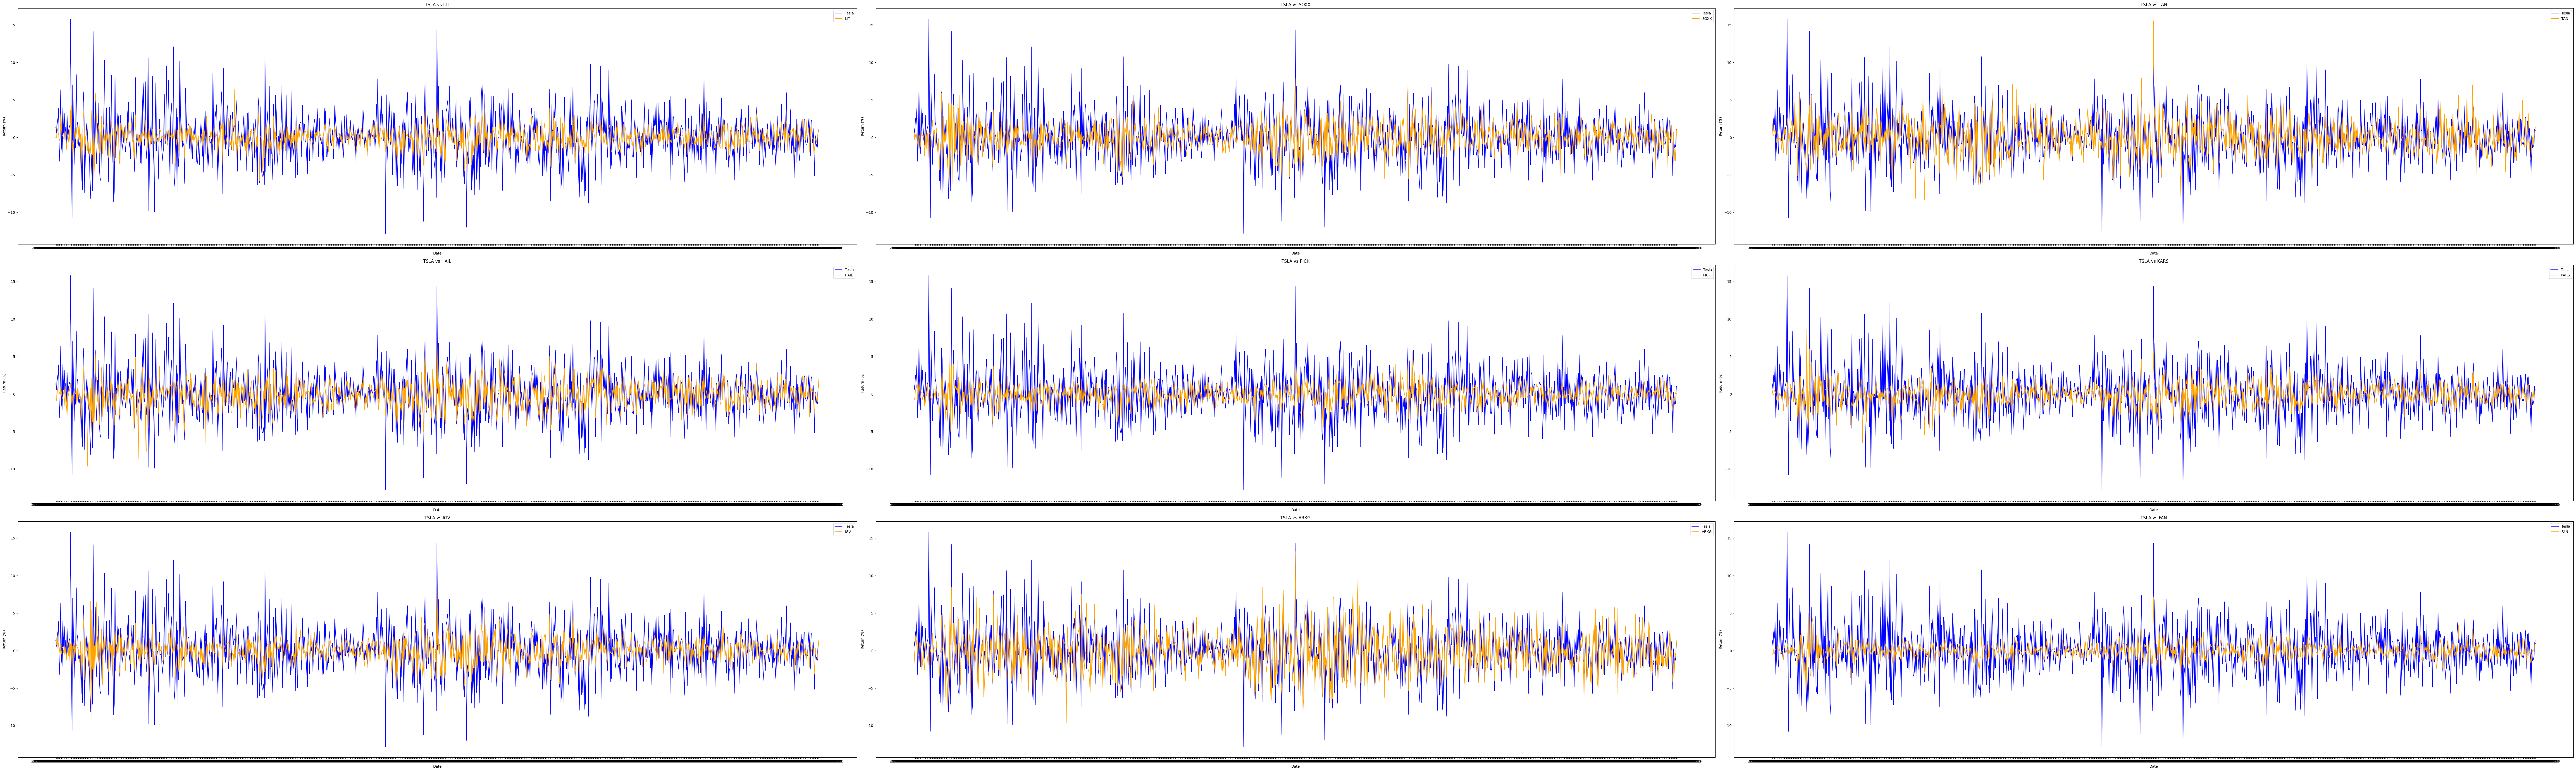

In [7]:
num_rows = 3
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(100, 30))

axs = axs.flatten()

for i, etf_name in enumerate(etf_names[:-1]):
    axs[i].plot(tsla['Date'], tsla['Return_TSLA'], label='Tesla', color='blue', alpha=1)
    axs[i].plot(etfs['Date'], etfs[f'Return_{etf_name}'], label=etf_name, color='orange', alpha=1)
    
    axs[i].set_title(f'TSLA vs {etf_name}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Return (%)')
    axs[i].legend()
    axs[i].grid(False)

plt.tight_layout()
plt.show()


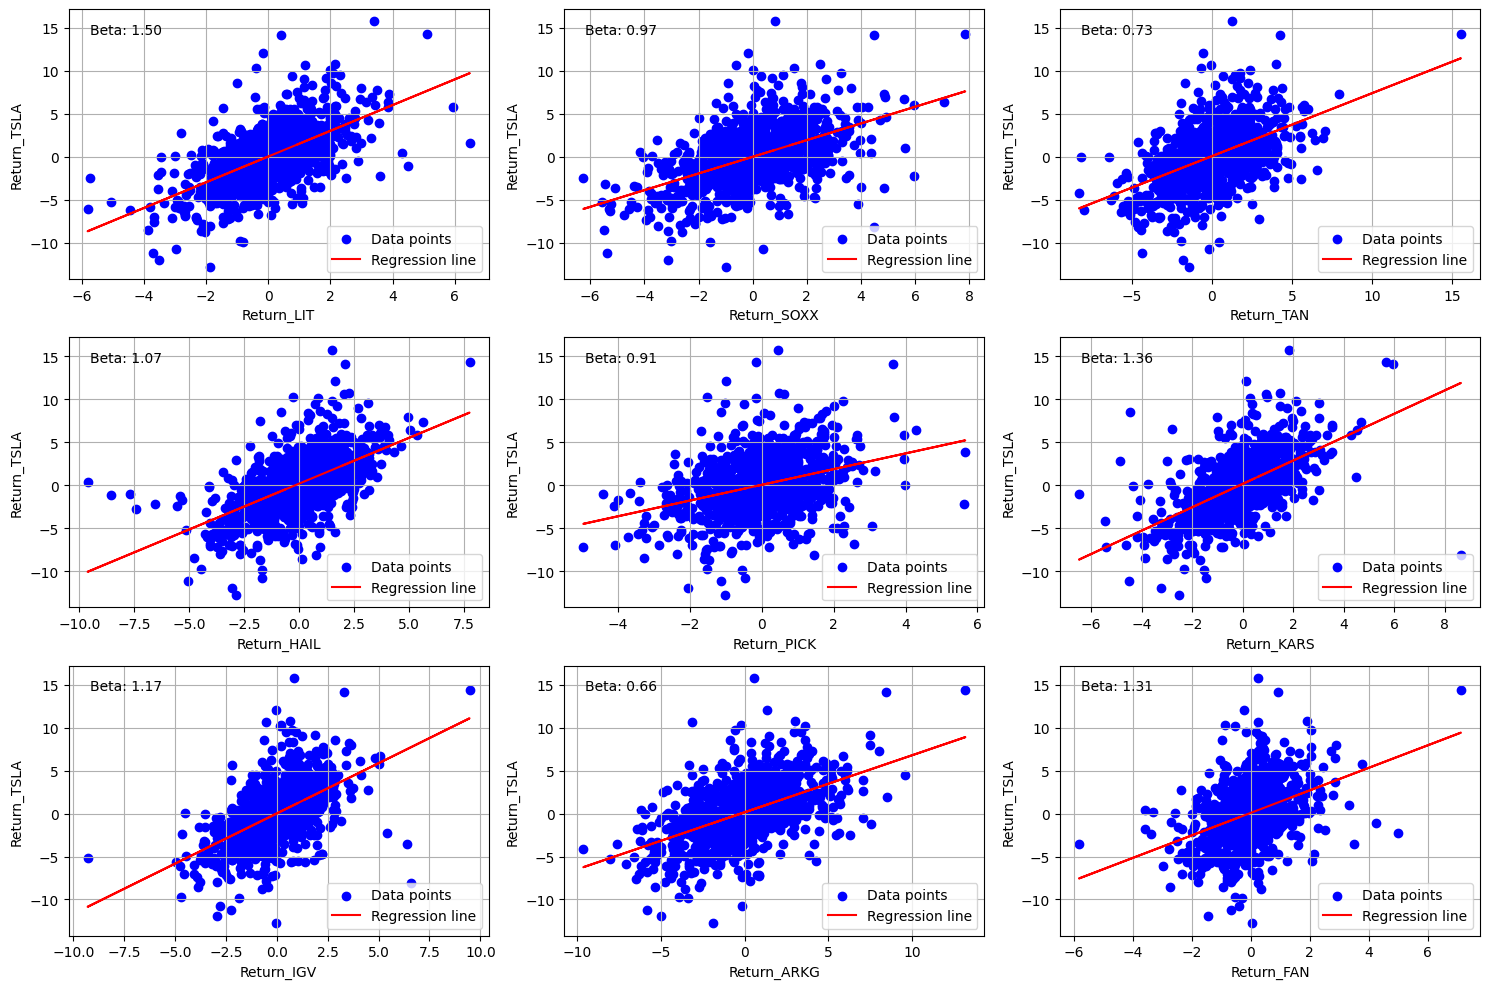

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, etf_name in enumerate(etf_names[:-1]):
    row_index = i // 3
    col_index = i % 3
    
    slope, intercept, _, _, _ = linregress(etfs[f'Return_{etf_name}'], tsla['Return_TSLA'])
    regression_line = slope * etfs[f'Return_{etf_name}'] + intercept
    
    axs[row_index, col_index].scatter(etfs[f'Return_{etf_name}'], tsla['Return_TSLA'], color='blue', label='Data points')
    axs[row_index, col_index].plot(etfs[f'Return_{etf_name}'], regression_line, color='red', label='Regression line')
    axs[row_index, col_index].set_xlabel(f'Return_{etf_name}')
    axs[row_index, col_index].set_ylabel('Return_TSLA')
    axs[row_index, col_index].grid(True)
    axs[row_index, col_index].legend(loc='lower right')
    beta_text = f'Beta: {slope:.2f}'
    axs[row_index, col_index].text(0.05, 0.95, beta_text, ha='left', va='top', transform=axs[row_index, col_index].transAxes, fontsize=10)

plt.tight_layout()
plt.show()


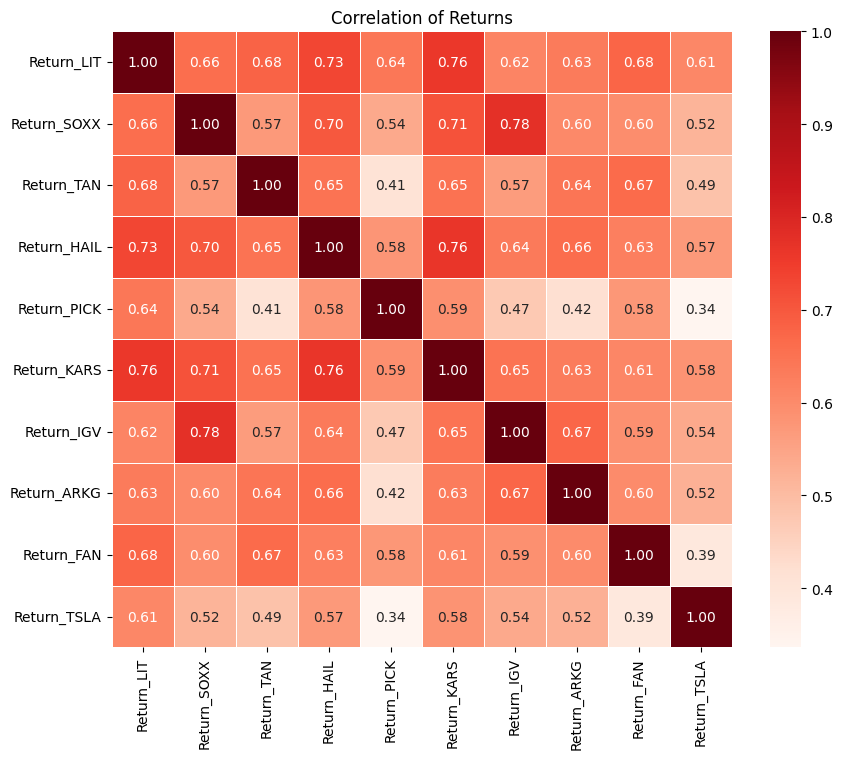

In [9]:
selected_df = etfs[cols].copy()
selected_df["Return_TSLA"] = tsla["Return_TSLA"].copy()

correlation_matrix = selected_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title('Correlation of Returns')
plt.show()

## Logistic Regression Based on Yesterday's return

In [10]:
X_classification = etfs[cols]
y_classification = [(1 if return_val > 0 else 0) for return_val in tsla['Return_TSLA']]

y_classification = y_classification[1:]
X_classification = X_classification[:-1]

len(y_classification), len(X_classification)

(1083, 1083)

In [11]:
X_train, X_test, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train_classification = np.array(y_train_classification)
y_test_classification = np.array(y_test_classification)

classifier = LogisticRegression()
classifier.fit(X_train, y_train_classification)

LogisticRegression()

In [12]:
y_pred_classification = classifier.predict(X_test)
classification_accuracy = accuracy_score(y_test_classification, y_pred_classification)
print("Classification Accuracy:", classification_accuracy)

Classification Accuracy: 0.5023041474654378


## Random Forest Based on Yesterday's return

In [13]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
random_forest_model.fit(X_train, y_train_classification)

RandomForestClassifier(max_depth=3, random_state=42)

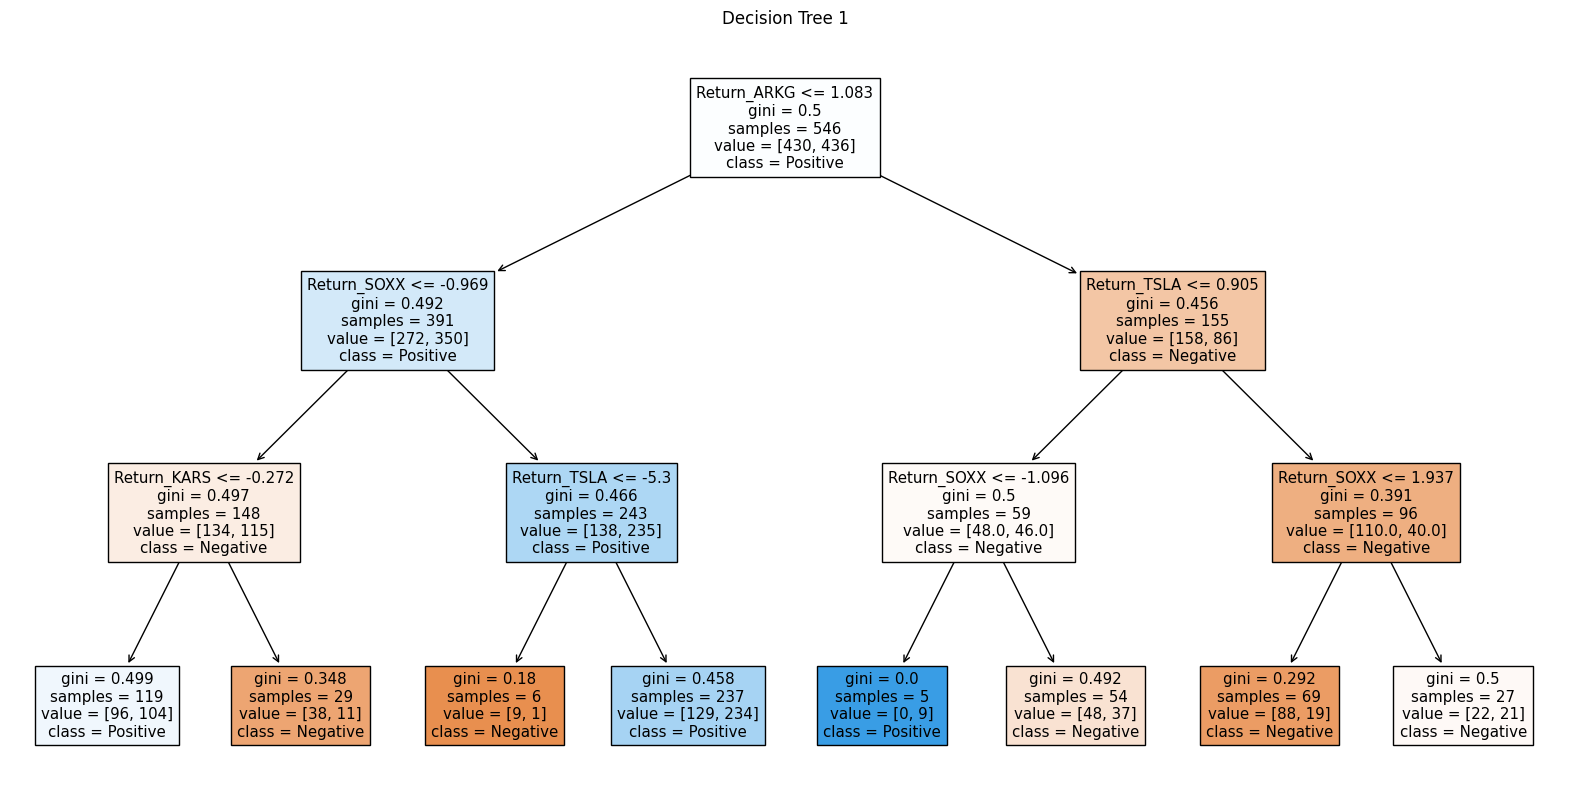

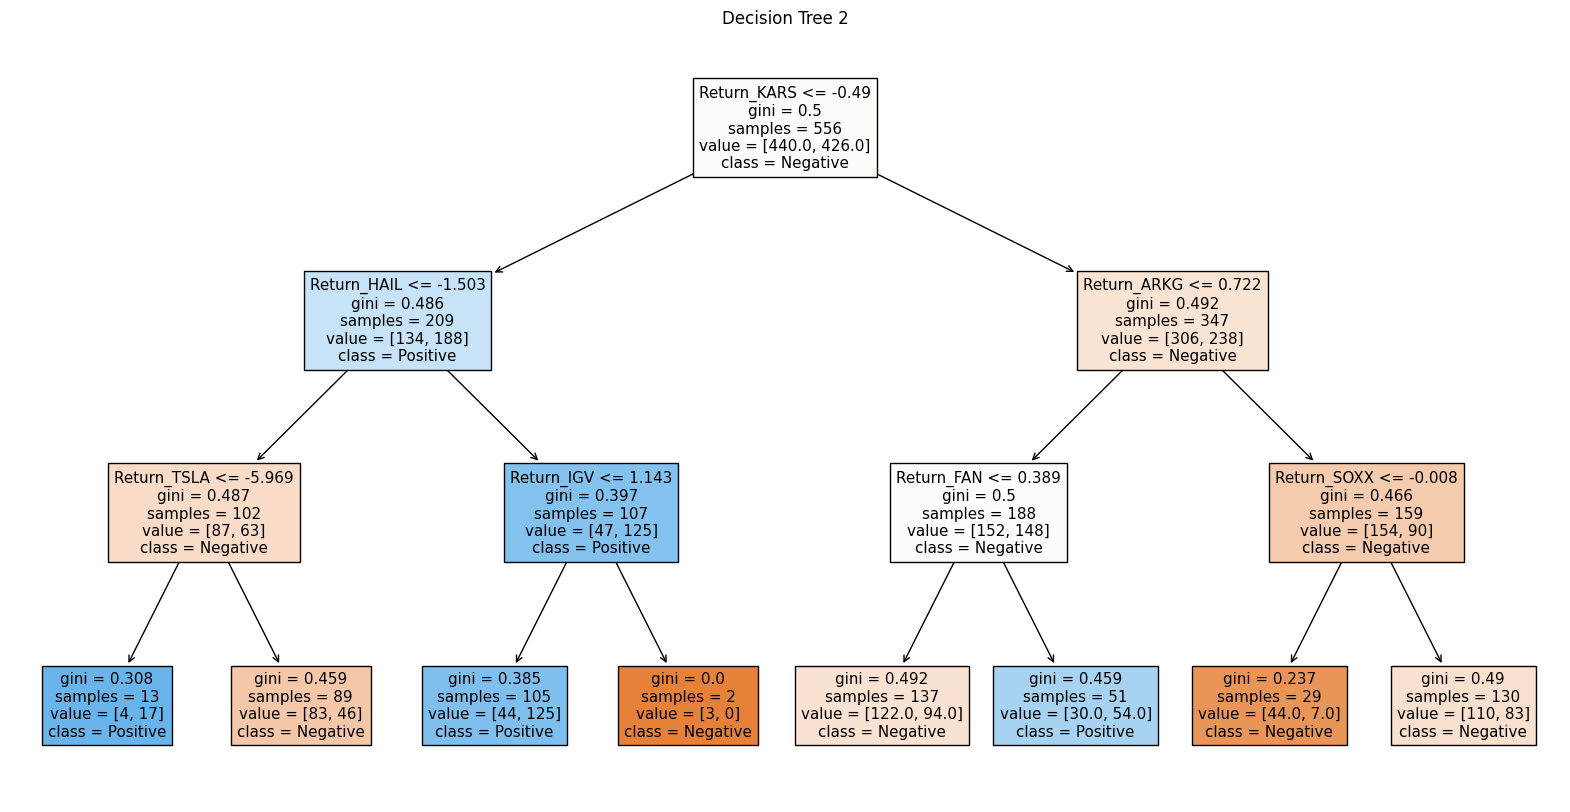

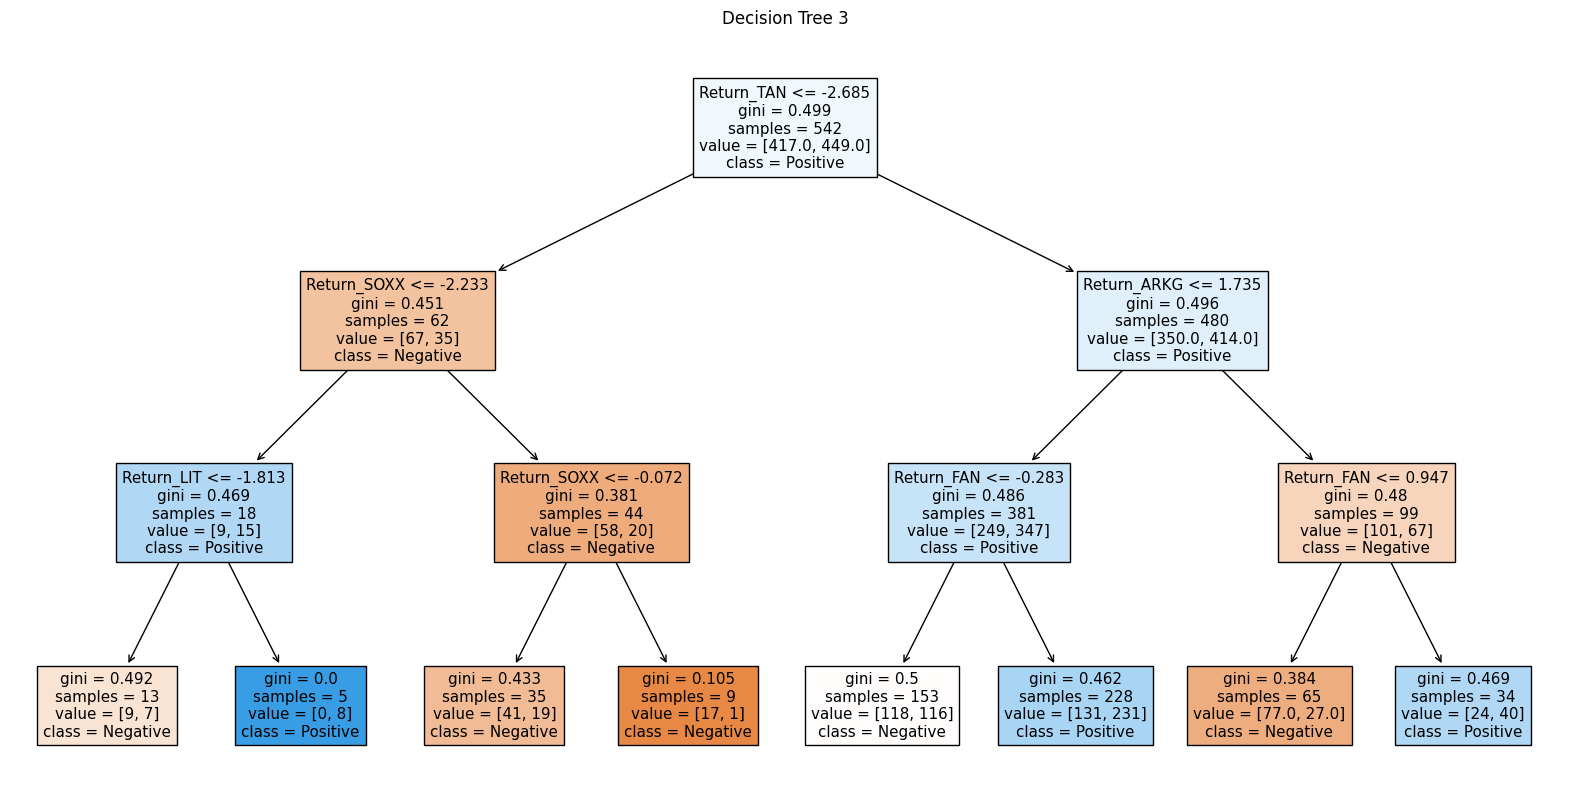

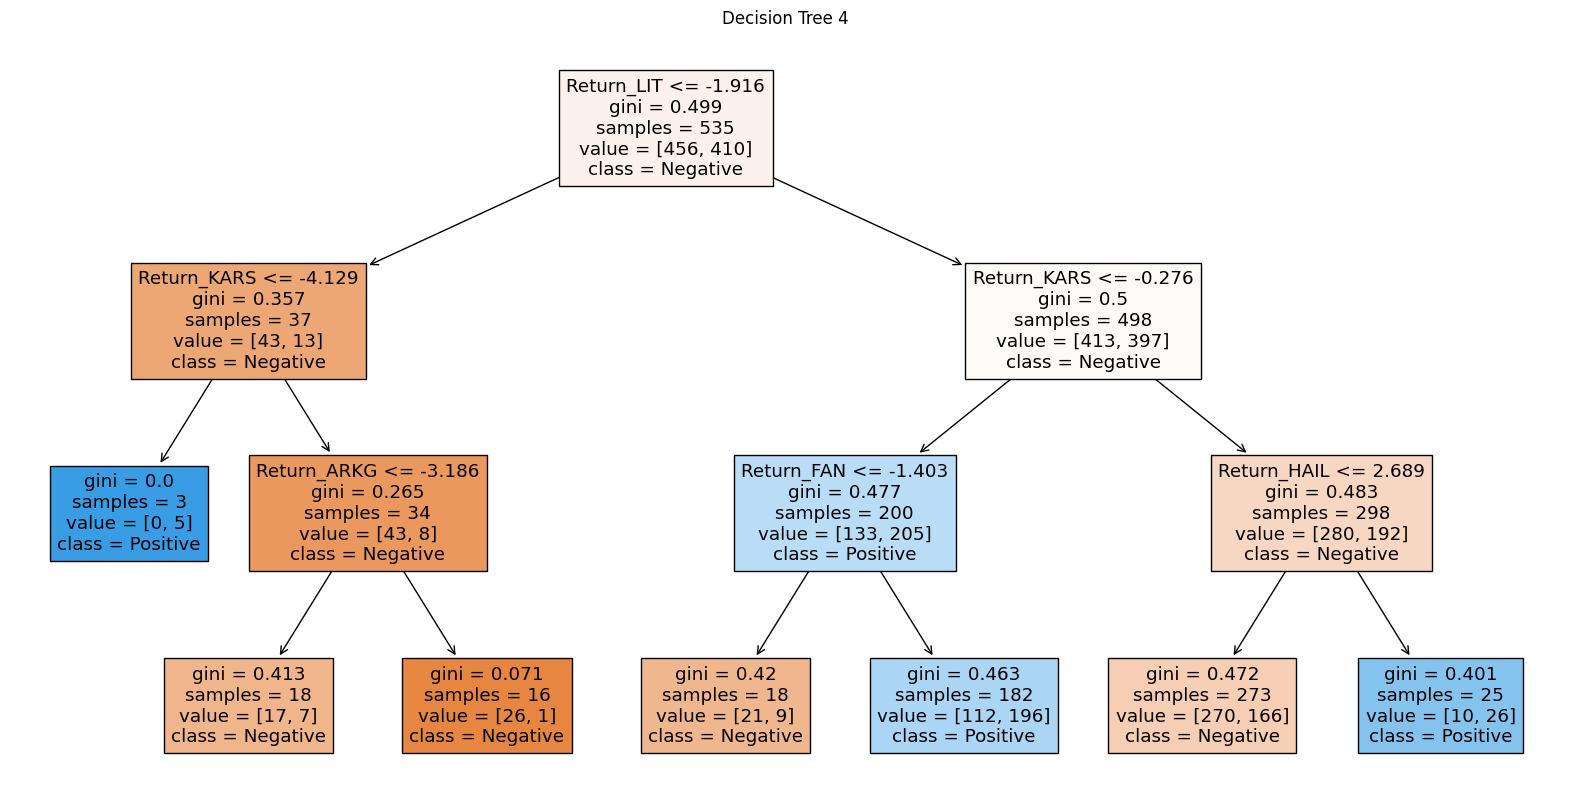

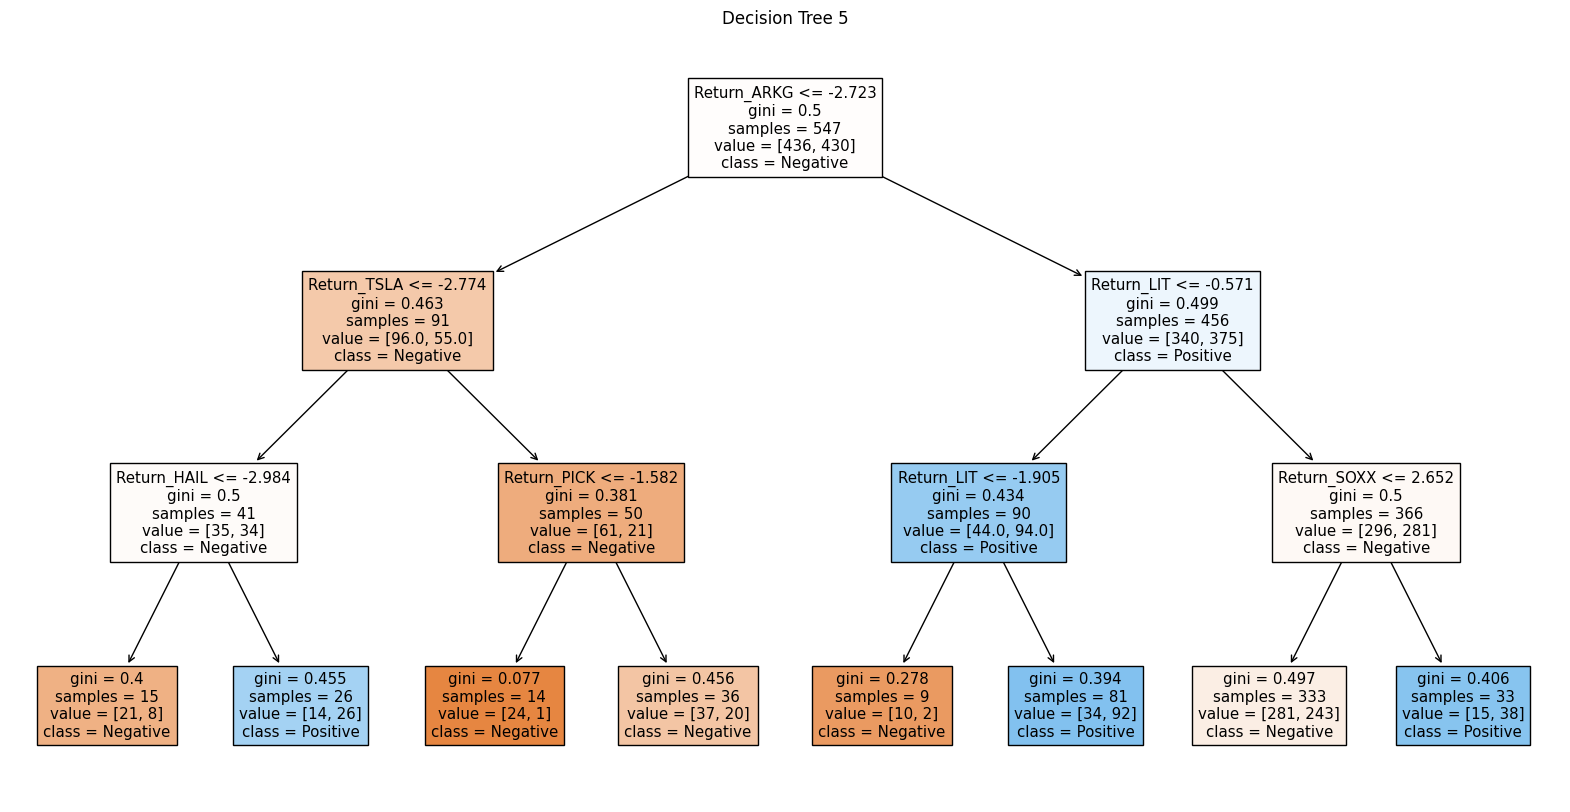

In [14]:
# Define the number of trees to plot
num_trees_to_plot = 5

# Plot the first 'num_trees_to_plot' decision trees in the Random Forest
for i in range(num_trees_to_plot):
    plt.figure(figsize=(20, 10))  # Set the figure size
    plot_tree(random_forest_model.estimators_[i], feature_names=cols, class_names=["Negative", "Positive"], filled=True)
    plt.title(f"Decision Tree {i+1}")
    plt.show()

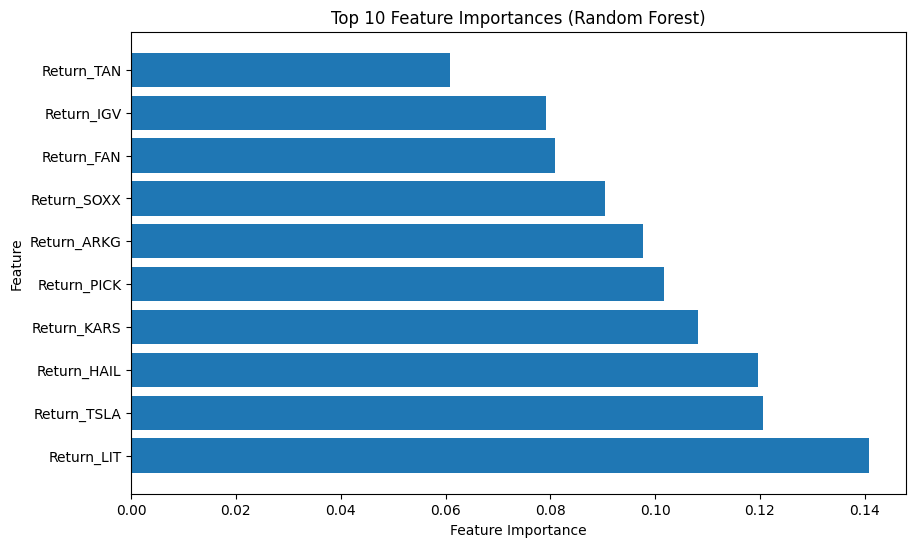

In [15]:
feature_importances = random_forest_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N feature names and importances
top_n = min(10, len(feature_importances))  # Specify the number of top features to display
top_feature_names = [cols[i] for i in sorted_indices[:top_n]]
top_feature_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances (Random Forest)'.format(top_n))
plt.show()

In [16]:
y_pred_classification = random_forest_model.predict(X_test)


randomtree_accuracy = accuracy_score(y_test_classification, y_pred_classification)
print("RandomTree Accuracy:", randomtree_accuracy)

RandomTree Accuracy: 0.5668202764976958


## Gradient Boosting Classifier Based on Yesterday's return

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier.fit(X_train, y_train_classification)

GradientBoostingClassifier(random_state=42)

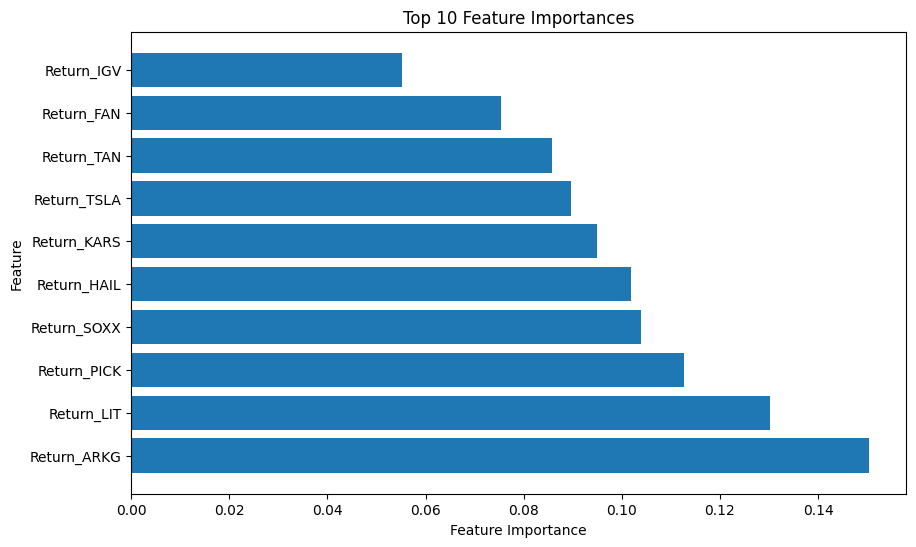

In [18]:
# Get feature importances from the trained model
feature_importances = gbm_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N feature names and importances
top_n = min(10, len(feature_importances))  # Specify the number of top features to display
top_feature_names = [cols[i] for i in sorted_indices[:top_n]]
top_feature_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()

In [19]:
y_pred_classification = gbm_classifier.predict(X_test)


gbm_accuracy = accuracy_score(y_test_classification, y_pred_classification)
print("GBM Accuracy:", gbm_accuracy)

GBM Accuracy: 0.4976958525345622


## k-NN Based on Yesterday's return

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have X_train and y_train_classification
# Replace n_neighbors with the desired number of neighbors
# Replace other parameters as needed (e.g., weights, algorithm)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train_classification)

KNeighborsClassifier()

In [21]:
y_pred_classification = knn_classifier.predict(X_test)


knn_accuracy = accuracy_score(y_test_classification, y_pred_classification)
print("k-NN Accuracy:", knn_accuracy)

k-NN Accuracy: 0.5253456221198156


In [22]:
from matplotlib.colors import ListedColormap

# Define a function to plot the decision boundary for a k-NN classifier
def plot_decision_boundary(X, y, classifier, title):
    h = 0.02  # Step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Light colormap for decision regions
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # Bold colormap for data points

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

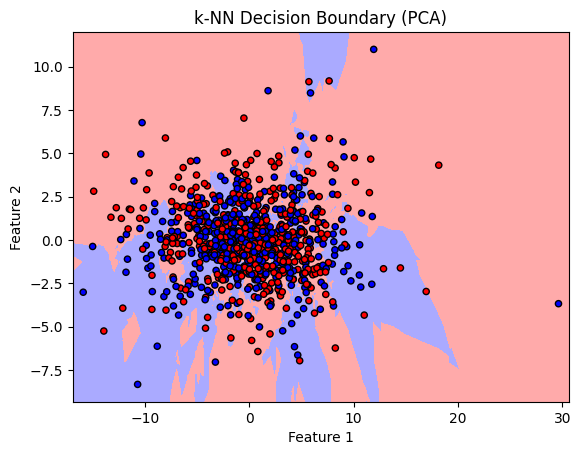

In [23]:
from sklearn.decomposition import PCA

# Reduce dimensionality of input data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
knn_pca_classifier = KNeighborsClassifier(n_neighbors=10)
knn_pca_classifier.fit(X_train_pca, y_train_classification)
# Plot decision boundary using reduced-dimensional input data
plot_decision_boundary(X_train_pca, y_train_classification, knn_pca_classifier, title='k-NN Decision Boundary (PCA)')

## Neural Networks Based on Yesterday's return

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))  # Assuming X_train.shape[1] is the number of features
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_classification, epochs=10, batch_size=32, validation_split=0.2)  # Assuming 10 epochs and batch size of 32

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_classification)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5310 - loss: 0.7117 - val_accuracy: 0.5172 - val_loss: 0.7032
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.5192 - loss: 0.6849 - val_accuracy: 0.5057 - val_loss: 0.7063
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.5906 - loss: 0.6701 - val_accuracy: 0.5345 - val_loss: 0.7075
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.5619 - loss: 0.6727 - val_accuracy: 0.4828 - val_loss: 0.7097
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.6131 - loss: 0.6576 - val_accuracy: 0.4828 - val_loss: 0.7136
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.5672 - loss: 0.6649 - val_accuracy: 0.4828 - val_loss: 0.7116
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.6041 - loss: 0.6623 - val_accuracy: 0.4828 - val_loss: 0.7173
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.5979 - loss: 0.6570 - val_accuracy: 0.4885 - val_lo

## Logistic Regression Based on n days rolling window

In [25]:
X_classification_2 = etfs[cols_2]
y_classification_2 = [(1 if return_val > 0 else 0) for return_val in tsla['Return_TSLA']]

X_classification_2 = X_classification_2[window_size-1:-1]
y_classification_2 = y_classification_2[window_size:]

len(y_classification_2), len(X_classification_2)

(1082, 1082)

In [26]:
X_train_2, X_test_2, y_train_classification_2, y_test_classification_2 = train_test_split(X_classification_2, y_classification_2, test_size=0.2, random_state=42)

X_train_2 = np.array(X_train_2)
X_test_2 = np.array(X_test_2)
y_train_classification_2 = np.array(y_train_classification_2)
y_test_classification_2 = np.array(y_test_classification_2)

classifier = LogisticRegression()
classifier.fit(X_train_2, y_train_classification_2)

LogisticRegression()

In [27]:
y_pred_classification_2 = classifier.predict(X_test_2)
classification_accuracy = accuracy_score(y_test_classification_2, y_pred_classification_2)
print("Classification Accuracy:", classification_accuracy)

Classification Accuracy: 0.4838709677419355


## Random Forest Model Based on n days rolling window

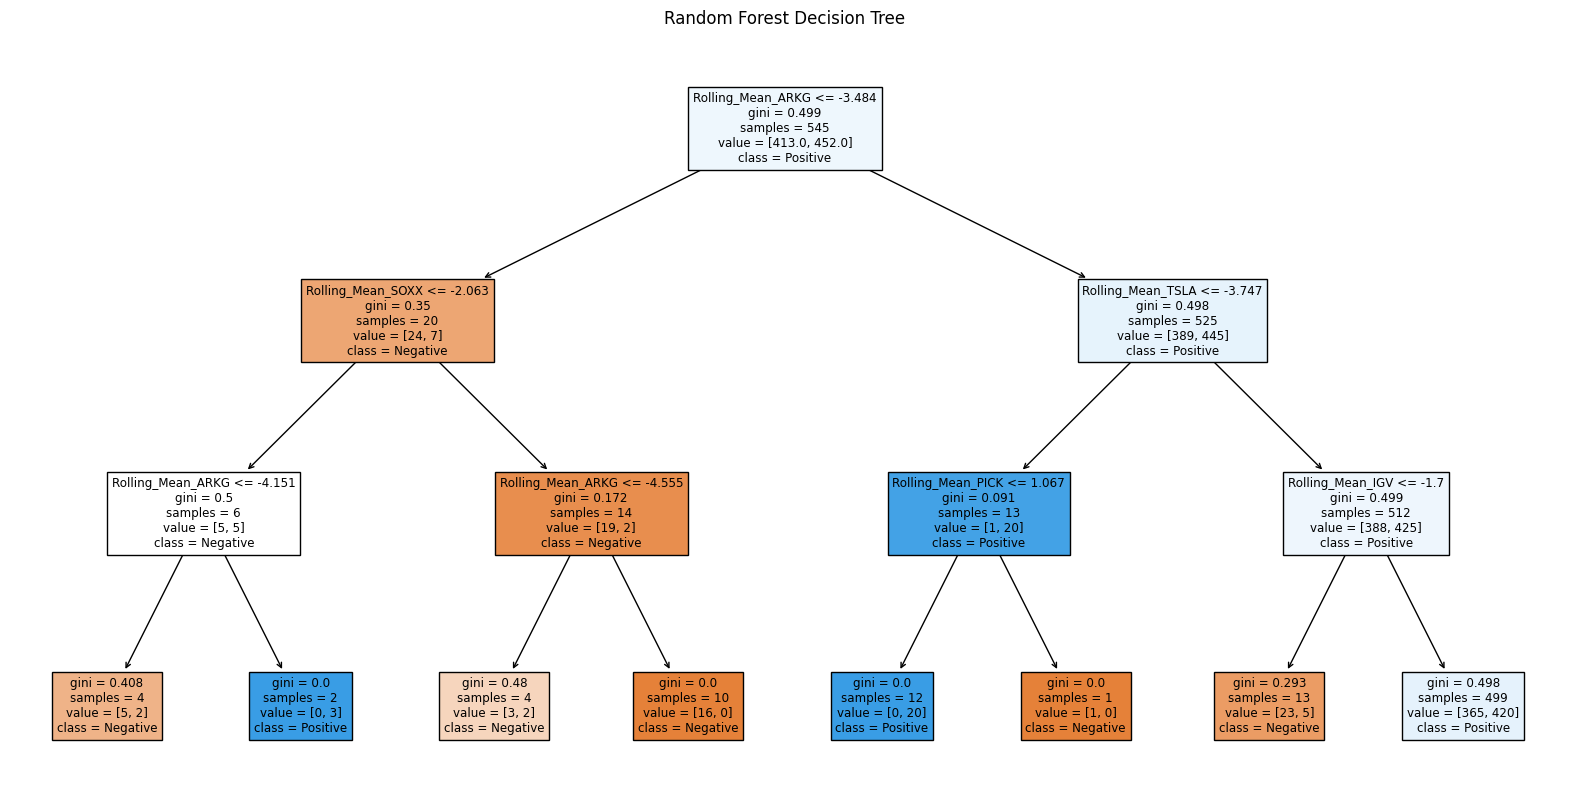

In [28]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_classifier.fit(X_train_2, y_train_classification_2)


plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], feature_names=cols_2, class_names=['Negative', 'Positive'], filled=True)
plt.title('Random Forest Decision Tree')
plt.show()

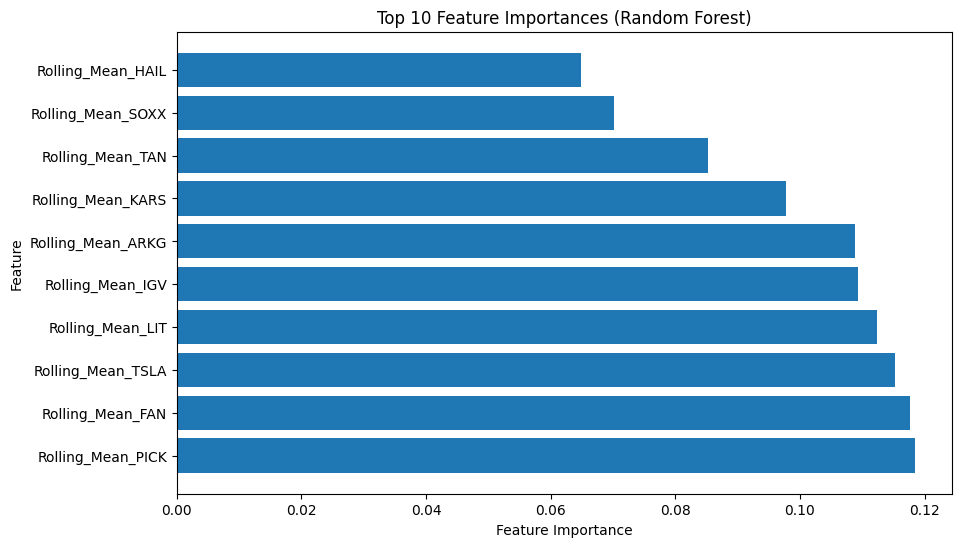

In [29]:
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N feature names and importances
top_n = min(10, len(feature_importances))  # Specify the number of top features to display
top_feature_names = [cols_2[i] for i in sorted_indices[:top_n]]
top_feature_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances (Random Forest)'.format(top_n))
plt.show()

In [30]:
y_pred_classification_2 = rf_classifier.predict(X_test_2)


randomtree_accuracy = accuracy_score(y_test_classification_2, y_pred_classification_2)
print("RandomTree Accuracy:", randomtree_accuracy)

RandomTree Accuracy: 0.5253456221198156


## Gradient Boosting Classifier Based on n days rolling window

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier.fit(X_train_2, y_train_classification_2)

GradientBoostingClassifier(random_state=42)

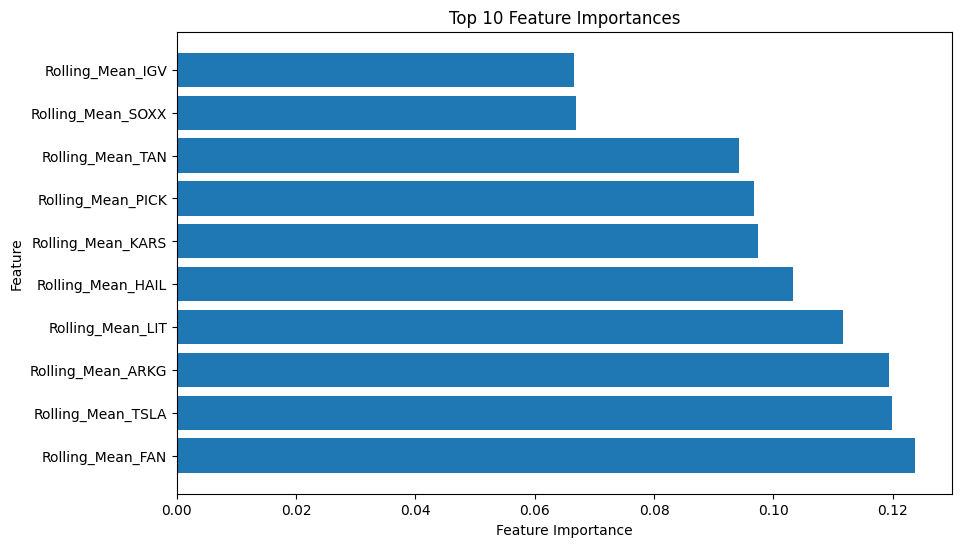

In [32]:
# Get feature importances from the trained model
feature_importances = gbm_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N feature names and importances
top_n = min(10, len(feature_importances))  # Specify the number of top features to display
top_feature_names = [cols_2[i] for i in sorted_indices[:top_n]]
top_feature_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()

In [33]:
y_pred_classification_2 = gbm_classifier.predict(X_test_2)


gbm_accuracy = accuracy_score(y_test_classification_2, y_pred_classification_2)
print("GBM Accuracy:", gbm_accuracy)

GBM Accuracy: 0.4470046082949309


## k-NN Based on n days rolling window

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have X_train and y_train_classification
# Replace n_neighbors with the desired number of neighbors
# Replace other parameters as needed (e.g., weights, algorithm)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_2, y_train_classification_2)

KNeighborsClassifier()

In [35]:
y_pred_classification_2 = knn_classifier.predict(X_test_2)


knn_accuracy = accuracy_score(y_test_classification_2, y_pred_classification_2)
print("k-NN Accuracy:", knn_accuracy)

k-NN Accuracy: 0.48847926267281105


## Neural Networks Based on n days rolling window

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_2,y_train_classification_2, epochs=20, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_2, y_test_classification)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4854 - loss: 0.7189 - val_accuracy: 0.4509 - val_loss: 0.7150
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.5394 - loss: 0.6900 - val_accuracy: 0.4566 - val_loss: 0.7190
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.5449 - loss: 0.6856 - val_accuracy: 0.4509 - val_loss: 0.7161
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.5689 - loss: 0.6777 - val_accuracy: 0.4393 - val_loss: 0.7221
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.5578 - loss: 0.6762 - val_accuracy: 0.4624 - val_loss: 0.7189
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.5963 - loss: 0.6681 - val_accuracy: 0.4393 - val_loss: 0.7246
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.6127 - loss: 0.6629 - val_accuracy: 0.4393 - val_loss: 0.7252
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.6453 - loss: 0.6579 - val_accuracy: 0.4451 - val_lo

## LSTM Based on n days short memory

In [37]:
def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Define your time_steps
time_steps = 10

# Create sequences from data
X_seq, y_seq = create_sequences(X_classification, y_classification, time_steps)

In [38]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_train, y_train, epochs=50, verbose=0)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Test MSE:", mse)

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.4290
Test MSE: 0.451511412858963


In [39]:
# Make predictions
y_pred = model.predict(X_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [40]:
#accuracy
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.48372093023255813
